# **Billboard Hot 100 - Full Historical Exploratory Data Analysis (EDA)**

## **1️⃣ Introduction**

### **What is the Billboard Hot 100?**
The **Billboard Hot 100** is the definitive weekly chart that ranks the most popular songs in the United States, combining metrics from:
- Physical and digital sales
- Radio airplay
- Streaming activity (e.g., YouTube, Spotify)

The chart has been published **weekly since 1958**, making it one of the most important barometers of musical popularity in the world.

---

## **2️⃣ Why Analyze Billboard Data?**

This project seeks to explore the **full history of Billboard Hot 100** rankings—from its inception to today—to uncover long-term trends in music such as:
- The evolution of artist dominance across decades
- Longevity of songs on the charts
- Patterns in chart-topping hits
- Shifts in musical styles, collaborations, and industry dynamics

These insights will be useful for **musicologists**, **data analysts**, **industry professionals**, and **fans** interested in how music success has evolved.

---

## **3️⃣ Dataset Source**

Instead of scraping data from Billboard.com or using unstable third-party APIs, this project uses a **public, open-source JSON dataset hosted on GitHub**, which acts like a static API.

> 📦 Source:  
> [https://github.com/mhollingshead/billboard-hot-100](https://github.com/mhollingshead/billboard-hot-100)

We use the `all.json` file, which includes **every weekly chart** in Billboard Hot 100 history in the following structure:

[
  {
    "date": "1958-08-04",
    "data": [
      {
        "song": "Poor Little Fool",
        "artist": "Ricky Nelson",
        "this_week": 1,
        "last_week": null,
        "peak_position": 1,
        "weeks_on_chart": 1
      },
    ]
  },
]


##**Dataset struture**

| Column Name       | Description                                     |
|------------------|--------------------------------------------------|
| `date`           | The chart's release date (weekly)                |
| `rank`           | Position on the Hot 100 during that week         |
| `title`          | Song title                                       |
| `artist`         | Performing artist(s)                             |
| `last_week`      | Position the previous week                       |
| `peak_position`  | Highest position reached so far                  |
| `weeks_on_chart` | Number of weeks the song has been on the chart   |


With a github repository

In [ ]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/mhollingshead/billboard-hot-100/main/all.json"
response = requests.get(url)

if response.status_code == 200:
    charts = response.json()  
    
    all_data = []

    for chart in charts:
        chart_date = chart["date"]
        for entry in chart["data"]:
            all_data.append({
                "date": chart_date,
                "rank": entry.get("this_week"),
                "title": entry.get("song"),
                "artist": entry.get("artist"),
                "last_week": entry.get("last_week"),
                "peak_position": entry.get("peak_position"),
                "weeks_on_chart": entry.get("weeks_on_chart")
            })

    df = pd.DataFrame(all_data)
    df.to_csv("../data/raw/billboard_full_chart_data.csv", index=False)
    print("Dataset saved as 'billboard_full_chart_data.csv'")
    print(df.head())

else:
    print(f"Failed to fetch chart data. Status code: {response.status_code}")


Dataset saved as 'billboard_full_chart_data.csv'
         date  rank              title                              artist  \
0  1958-08-04     1   Poor Little Fool                        Ricky Nelson   
1  1958-08-04     2           Patricia       Perez Prado And His Orchestra   
2  1958-08-04     3      Splish Splash                         Bobby Darin   
3  1958-08-04     4  Hard Headed Woman  Elvis Presley With The Jordanaires   
4  1958-08-04     5               When                         Kalin Twins   

   last_week  peak_position  weeks_on_chart  
0        NaN              1               1  
1        NaN              2               1  
2        NaN              3               1  
3        NaN              4               1  
4        NaN              5               1  


In [ ]:
import polars as pl

df = pl.read_csv("../data/raw/billboard_full_chart_data.csv")
df.head(10)

date,rank,title,artist,last_week,peak_position,weeks_on_chart
str,i64,str,str,str,i64,i64
"""1958-08-04""",1,"""Poor Little Fool""","""Ricky Nelson""",null,1,1
"""1958-08-04""",2,"""Patricia""","""Perez Prado And His Orchestra""",null,2,1
"""1958-08-04""",3,"""Splish Splash""","""Bobby Darin""",null,3,1
"""1958-08-04""",4,"""Hard Headed Woman""","""Elvis Presley With The Jordana…",null,4,1
"""1958-08-04""",5,"""When""","""Kalin Twins""",null,5,1
"""1958-08-04""",6,"""Rebel-'rouser""","""Duane Eddy His Twangy Guitar A…",null,6,1
"""1958-08-04""",7,"""Yakety Yak""","""The Coasters""",null,7,1
"""1958-08-04""",8,"""My True Love""","""Jack Scott""",null,8,1
"""1958-08-04""",9,"""Willie And The Hand Jive""","""The Johnny Otis Show""",null,9,1


In [2]:
print(df.schema)

Schema([('date', String), ('rank', Int64), ('title', String), ('artist', String), ('last_week', String), ('peak_position', Int64), ('weeks_on_chart', Int64)])


In [3]:
weekly_counts = df.group_by("date").count().sort("date")
print("\nVerificando la cantidad de registros por semana:")
print(weekly_counts.describe())


Verificando la cantidad de registros por semana:
shape: (9, 3)
┌────────────┬────────────┬───────────┐
│ statistic  ┆ date       ┆ count     │
│ ---        ┆ ---        ┆ ---       │
│ str        ┆ str        ┆ f64       │
╞════════════╪════════════╪═══════════╡
│ count      ┆ 3477       ┆ 3477.0    │
│ null_count ┆ 0          ┆ 0.0       │
│ mean       ┆ null       ┆ 99.996261 │
│ std        ┆ null       ┆ 0.061041  │
│ min        ┆ 1958-08-04 ┆ 99.0      │
│ 25%        ┆ null       ┆ 100.0     │
│ 50%        ┆ null       ┆ 100.0     │
│ 75%        ┆ null       ┆ 100.0     │
│ max        ┆ 2025-03-22 ┆ 100.0     │
└────────────┴────────────┴───────────┘


C:\Users\57302\AppData\Local\Temp\ipykernel_15288\1204362609.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  weekly_counts = df.group_by("date").count().sort("date")


## **Data Cleaning ***

In [ ]:
# --------------------- 1. Check for Missing Values ---------------------
missing_values = df.null_count()
print("\nMissing Values Per Column:")
print(missing_values)

# --------------------- 2. Check for Duplicates ---------------------
duplicates = df.is_duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

if duplicates > 0:
    print("\nExample Duplicate Rows:")
    print(df.filter(df.is_duplicated()).head(5))

# Remove duplicates based on key identifiers
df = df.unique(subset=["date", "rank", "title", "artist"])

# --------------------- 3. Verify Unique Song Entries Per Week ---------------------
duplicate_songs = df.groupby(["date", "title", "artist"]).count().filter(pl.col("count") > 1)
print("\nSongs Appearing More Than Once in the Same Week:")
print(duplicate_songs)

# --------------------- 4. Validate Data Types ---------------------
print("\nColumn Data Types:")
print(df.schema)

# Convert to correct types if necessary
df = df.with_columns([
    pl.col("rank").cast(pl.Int64),
    pl.col("weeks_on_chart").cast(pl.Int64),
    pl.col("peak_position").cast(pl.Int64)
])

# --------------------- 5. Detect Outliers ---------------------
invalid_ranks = df.filter((pl.col("rank") < 1) | (pl.col("rank") > 100))
print("\nEntries with Invalid Rank (Not 1-100):")
print(invalid_ranks)

outlier_weeks = df.filter(pl.col("weeks_on_chart") > 500)
print("\nEntries with Unusually High Weeks on Chart:")
print(outlier_weeks)

# Remove invalid ranks
df = df.filter((pl.col("rank") >= 1) & (pl.col("rank") <= 100))

# --------------------- 6. Identify Missing 'last_week' Values ---------------------
missing_last_week = df.filter(pl.col("last_week").is_null()).shape[0]
print(f"\nNumber of Entries with Missing 'last_week': {missing_last_week}")

new_entries = df.filter(pl.col("last_week").is_null() & (pl.col("rank") == 1))
print("\nSongs with Missing 'last_week' That Debuted at #1:")
print(new_entries)

# Fill missing last_week with 0 (assuming new entry)
df = df.with_columns(
    pl.when(pl.col("last_week").is_null())
    .then(pl.lit(0))
    .otherwise(pl.col("last_week"))
    .alias("last_week")
)

fast_movers = df.filter((pl.col("last_week").is_not_null()) & (pl.col("rank") < pl.col("last_week") - 50))
print("\nSongs That Jumped More Than 50 Places in One Week:")
print(fast_movers)

# --------------------- Summary ---------------------
print("\nSummary of Data Cleaning Actions:")
print(f"Removed {duplicates} duplicate rows.")
print(f"Converted 'date' to datetime format.")
print(f"Corrected invalid ranks outside 1-100.")
print(f"Filled {missing_last_week} missing 'last_week' values with 0.")
print("Dataset is now cleaned and ready for further analysis.")


Missing Values Per Column:
shape: (1, 7)
┌──────┬──────┬───────┬────────┬───────────┬───────────────┬────────────────┐
│ date ┆ rank ┆ title ┆ artist ┆ last_week ┆ peak_position ┆ weeks_on_chart │
│ ---  ┆ ---  ┆ ---   ┆ ---    ┆ ---       ┆ ---           ┆ ---            │
│ u32  ┆ u32  ┆ u32   ┆ u32    ┆ u32       ┆ u32           ┆ u32            │
╞══════╪══════╪═══════╪════════╪═══════════╪═══════════════╪════════════════╡
│ 0    ┆ 0    ┆ 0     ┆ 0      ┆ 35102     ┆ 0             ┆ 0              │
└──────┴──────┴───────┴────────┴───────────┴───────────────┴────────────────┘



Number of Duplicate Rows: 0


AttributeError: 'DataFrame' object has no attribute 'groupby'

General Dataset Statistics & Date Processing

In [ ]:
df = df.with_columns(
    pl.col("date").str.strptime(pl.Date, "%Y-%m-%d")
)

df = df.with_columns(
    pl.col("date").dt.year().alias("year"),
    (pl.col("date").dt.year() // 10 * 10).alias("decade")
)


In [ ]:
dates_unique = df.select("date").unique().sort("date")
print("\nDate range in the dataset:")
print(f"Oldest date: {dates_unique.min()}")
print(f"Most recent date: {dates_unique.max()}")


decade_stats = (
    df
    .group_by("decade")
    .agg([
        pl.col("weeks_on_chart").mean().alias("avg_weeks_on_chart"),
        pl.col("rank").len().alias("total_entries")
    ])
    .sort("decade")
)

print("\nEvolution of song longevity by decade:")
print(decade_stats)



Date range in the dataset:
Oldest date: shape: (1, 1)
┌────────────┐
│ date       │
│ ---        │
│ date       │
╞════════════╡
│ 1958-08-04 │
└────────────┘
Most recent date: shape: (1, 1)
┌────────────┐
│ date       │
│ ---        │
│ date       │
╞════════════╡
│ 2025-03-22 │
└────────────┘

Evolution of song longevity by decade:
shape: (8, 3)
┌────────┬────────────────────┬───────────────┐
│ decade ┆ avg_weeks_on_chart ┆ total_entries │
│ ---    ┆ ---                ┆ ---           │
│ i32    ┆ f64                ┆ u32           │
╞════════╪════════════════════╪═══════════════╡
│ 1950   ┆ 6.374595           ┆ 7400          │
│ 1960   ┆ 5.529674           ┆ 52100         │
│ 1970   ┆ 7.028264           ┆ 52187         │
│ 1980   ┆ 8.454636           ┆ 52200         │
│ 1990   ┆ 10.313781          ┆ 52100         │
│ 2000   ┆ 11.258602          ┆ 52200         │
│ 2010   ┆ 12.265575          ┆ 52200         │
│ 2020   ┆ 12.620513          ┆ 27300         │
└────────┴───────────────

Top Artists & Songs Rankings

In [ ]:
top_longest_songs = df.sort("weeks_on_chart", descending=True).head(10)
print("\nTop 10 songs with the most weeks on the Hot 100:")
print(top_longest_songs.select(["title", "artist", "weeks_on_chart"]))

top_artists = df.group_by("artist").count().sort("count", descending=True).head(20)
print("\nTop 20 artists with the most appearances on the Billboard Hot 100:")
print(top_artists) 

top_artists_per_decade = (
    df
    .group_by(["decade", "artist"])
    .agg(pl.len().alias("count"))
    .sort(["decade", "count"], descending=[False, True])
    .group_by("decade")
    .head(1)
)

print("\nTop artist per decade in the Hot 100:")
print(top_artists_per_decade)

most_weeks_at_one = (
    df
    .filter(pl.col("rank") == 1)
    .group_by(["title", "artist"])
    .agg(pl.len().alias("weeks_at_1"))
    .sort("weeks_at_1", descending=True)
)

print("\nSongs with the most weeks at #1:")
print(most_weeks_at_one.head(10))  

most_weeks_top10 = (
    df
    .filter(pl.col("rank") <= 10)
    .group_by(["title", "artist"])
    .agg(pl.len().alias("weeks_in_top10"))
    .sort("weeks_in_top10", descending=True)
)

print("\nSongs with the most weeks in the Top 10:")
print(most_weeks_top10.head(10))

top_artists_number_ones = df.filter(pl.col("rank") == 1).group_by("artist").count().sort("count", descending=True).head(20)
print("\nTop 20 artists with the most #1 hits on the Billboard Hot 100:")
print(top_artists_number_ones)



Top 10 songs with the most weeks on the Hot 100:
shape: (10, 3)
┌─────────────────┬─────────────────┬────────────────┐
│ title           ┆ artist          ┆ weeks_on_chart │
│ ---             ┆ ---             ┆ ---            │
│ str             ┆ str             ┆ i64            │
╞═════════════════╪═════════════════╪════════════════╡
│ Heat Waves      ┆ Glass Animals   ┆ 91             │
│ Blinding Lights ┆ The Weeknd      ┆ 90             │
│ Heat Waves      ┆ Glass Animals   ┆ 90             │
│ Blinding Lights ┆ The Weeknd      ┆ 89             │
│ Heat Waves      ┆ Glass Animals   ┆ 89             │
│ Blinding Lights ┆ The Weeknd      ┆ 88             │
│ Heat Waves      ┆ Glass Animals   ┆ 88             │
│ Radioactive     ┆ Imagine Dragons ┆ 87             │
│ Blinding Lights ┆ The Weeknd      ┆ 87             │
│ Heat Waves      ┆ Glass Animals   ┆ 87             │
└─────────────────┴─────────────────┴────────────────┘

Top 20 artists with the most appearances on the Billbo

C:\Users\57302\AppData\Local\Temp\ipykernel_11668\2478150498.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_artists = df.group_by("artist").count().sort("count", descending=True).head(20)
C:\Users\57302\AppData\Local\Temp\ipykernel_11668\2478150498.py:43: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_artists_number_ones = df.filter(pl.col("rank") == 1).group_by("artist").count().sort("count", descending=True).head(20)


Career & Longevity Analys 

In [ ]:
fastest_to_number_one = (
    df
    .filter(pl.col("rank") == 1)
    .group_by(["title", "artist"])
    .agg(pl.col("weeks_on_chart").min().alias("weeks_to_reach_1"))
    .sort("weeks_to_reach_1")
    .head(10)
)

print("\nTop 10 songs that reached #1 the fastest:")
print(fastest_to_number_one)

slowest_to_number_one = (
    df
    .filter(pl.col("rank") == 1)
    .group_by(["title", "artist"])
    .agg(pl.col("weeks_on_chart").max().alias("weeks_to_reach_1"))
    .sort("weeks_to_reach_1", descending=True)
    .head(10)
)

print("\nTop 10 songs that took the longest to reach #1:")
print(slowest_to_number_one)

artist_career_span = (
    df
    .group_by("artist")
    .agg([
        pl.col("date").min().alias("first_appearance"),
        pl.col("date").max().alias("last_appearance"),
    ])
    .with_columns(
        (pl.col("last_appearance") - pl.col("first_appearance"))
        .dt.total_days()
        .alias("career_span_days")
    )
    .with_columns(
        (pl.col("career_span_days") / 365).alias("career_span_years")
    )
    .sort("career_span_years", descending=True)
    .head(20)
)

print("\nTop 20 artists with the longest career span on the Billboard Hot 100:")
print(artist_career_span.select(["artist", "career_span_years"]))



Top 10 songs that reached #1 the fastest:
shape: (10, 3)
┌────────────────────────────────┬───────────────────────────────┬──────────────────┐
│ title                          ┆ artist                        ┆ weeks_to_reach_1 │
│ ---                            ┆ ---                           ┆ ---              │
│ str                            ┆ str                           ┆ i64              │
╞════════════════════════════════╪═══════════════════════════════╪══════════════════╡
│ One Sweet Day                  ┆ Mariah Carey & Boyz II Men    ┆ 1                │
│ Montero (Call Me By Your Name) ┆ Lil Nas X                     ┆ 1                │
│ 4X4                            ┆ Travis Scott                  ┆ 1                │
│ Poor Little Fool               ┆ Ricky Nelson                  ┆ 1                │
│ Shape Of You                   ┆ Ed Sheeran                    ┆ 1                │
│ Positions                      ┆ Ariana Grande                 ┆ 1              

## **Visual analysis**

In [ ]:
import matplotlib.pyplot as plt
import polars as pl

# Missing values bar chart
missing_values = df.null_count()
missing_values = missing_values.to_dict()
missing_values = {k: v for k, v in missing_values.items() if v > 0}

plt.figure(figsize=(10, 5))
plt.bar(missing_values.keys(), missing_values.values(), color="red")
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values in Dataset")
plt.xticks(rotation=45)
plt.show()

# Rank Distribution Histogram
plt.figure(figsize=(8, 5))
df["rank"].to_pandas().hist(bins=20, color="purple", edgecolor="black")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.title("Rank Distribution on Billboard Hot 100")
plt.show()

# Weeks on Chart Boxplot
plt.figure(figsize=(8, 5))
df["weeks_on_chart"].to_pandas().plot(kind="box", vert=False, color="blue")
plt.xlabel("Weeks")
plt.title("Distribution of Weeks on the Hot 100")
plt.show()

TypeError: the truth value of a Series is ambiguous

Here are some things you might want to try:
- instead of `if s`, use `if not s.is_empty()`
- instead of `s1 and s2`, use `s1 & s2`
- instead of `s1 or s2`, use `s1 | s2`
- instead of `s in [y, z]`, use `s.is_in([y, z])`


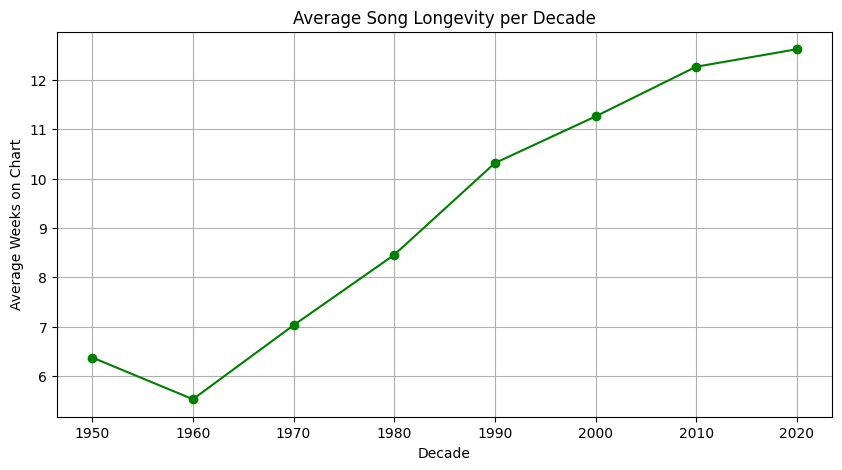

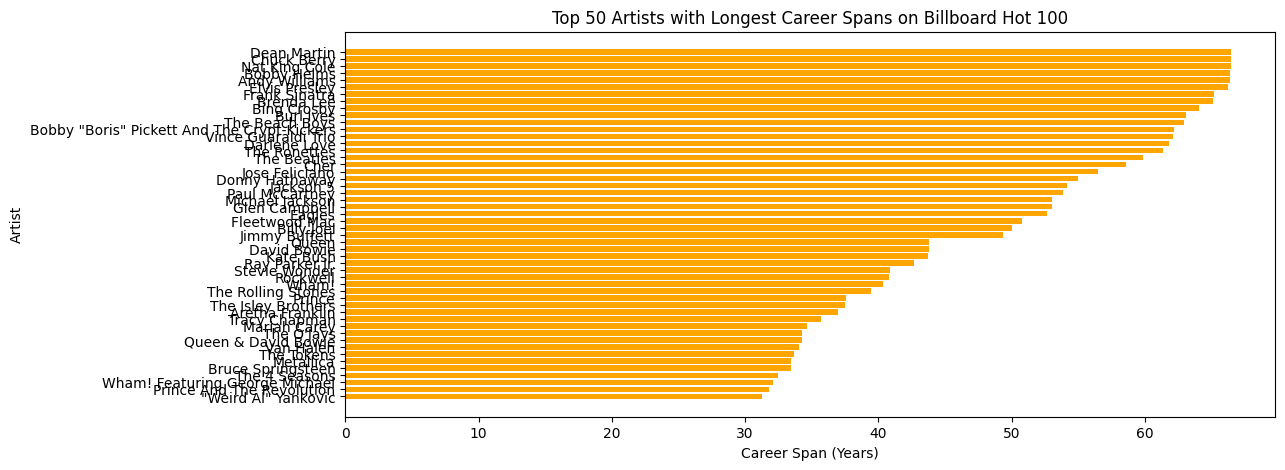

In [ ]:
decade_stats = (
    df
    .group_by("decade")
    .agg(pl.col("weeks_on_chart").mean().alias("avg_weeks_on_chart"))
    .sort("decade")
)

plt.figure(figsize=(10, 5))
plt.plot(decade_stats["decade"], decade_stats["avg_weeks_on_chart"], marker="o", linestyle="-", color="green")
plt.xlabel("Decade")
plt.ylabel("Average Weeks on Chart")
plt.title("Average Song Longevity per Decade")
plt.grid()
plt.show()

artist_career_span = (
    df
    .group_by("artist")
    .agg((pl.col("date").max() - pl.col("date").min()).dt.total_days().alias("career_span_days"))
    .with_columns((pl.col("career_span_days") / 365).alias("career_span_years"))
    .sort("career_span_years", descending=True)
    .head(50)
)

plt.figure(figsize=(12, 5))
plt.barh(artist_career_span["artist"], artist_career_span["career_span_years"], color="orange")
plt.xlabel("Career Span (Years)")
plt.ylabel("Artist")
plt.title("Top 50 Artists with Longest Career Spans on Billboard Hot 100")
plt.gca().invert_yaxis()
plt.show()


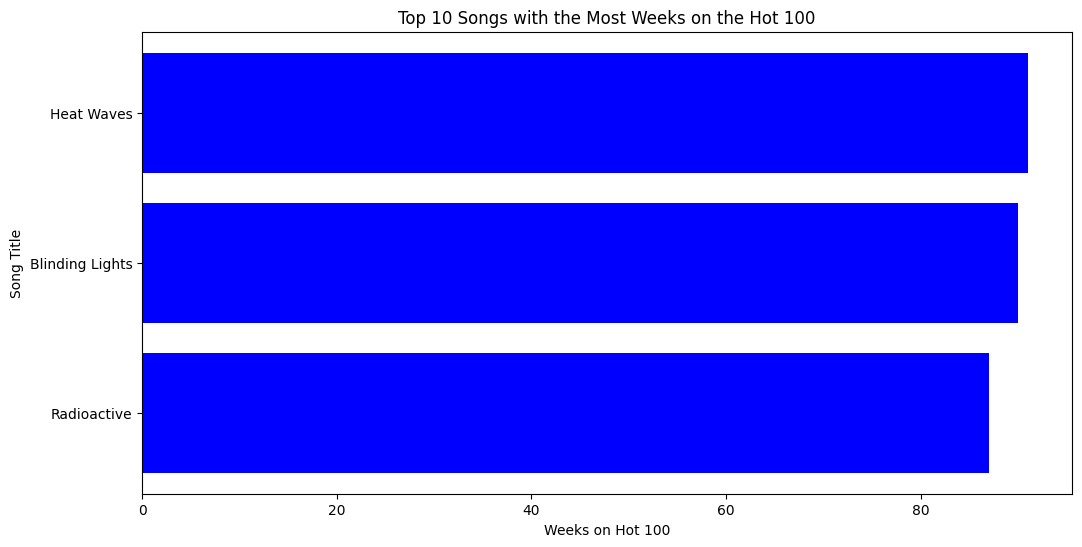

C:\Users\57302\AppData\Local\Temp\ipykernel_11668\3295146153.py:15: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_artists = df.group_by("artist").count().sort("count", descending=True).head(20)


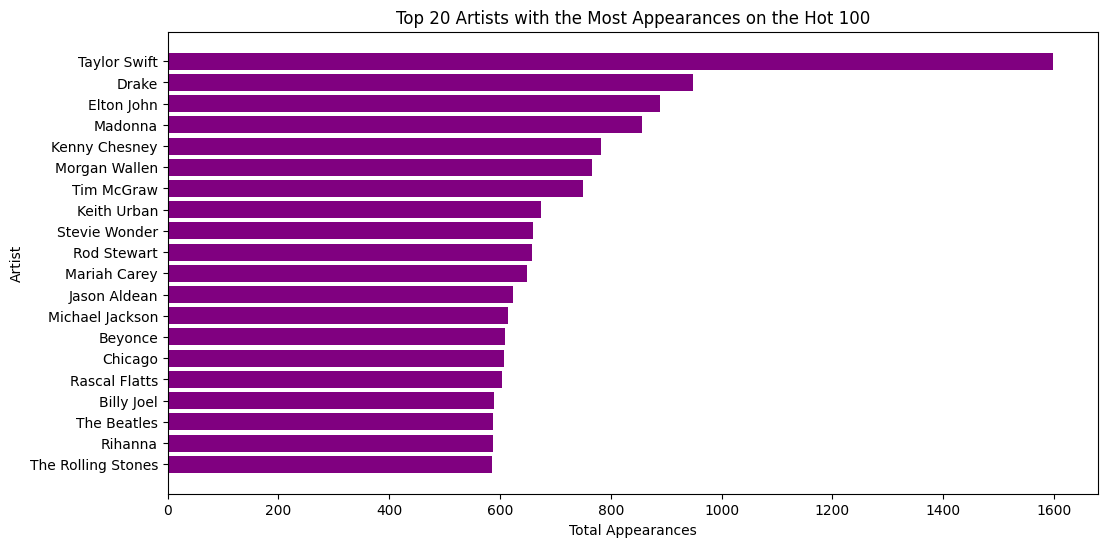

In [ ]:
top_longest_songs = df.sort("weeks_on_chart", descending=True).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_longest_songs["title"], top_longest_songs["weeks_on_chart"], color="blue")
plt.xlabel("Weeks on Hot 100")
plt.ylabel("Song Title")
plt.title("Top 10 Songs with the Most Weeks on the Hot 100")
plt.gca().invert_yaxis()
plt.show()

top_artists = df.group_by("artist").count().sort("count", descending=True).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_artists["artist"], top_artists["count"], color="purple")
plt.xlabel("Total Appearances")
plt.ylabel("Artist")
plt.title("Top 20 Artists with the Most Appearances on the Hot 100")
plt.gca().invert_yaxis()
plt.show()


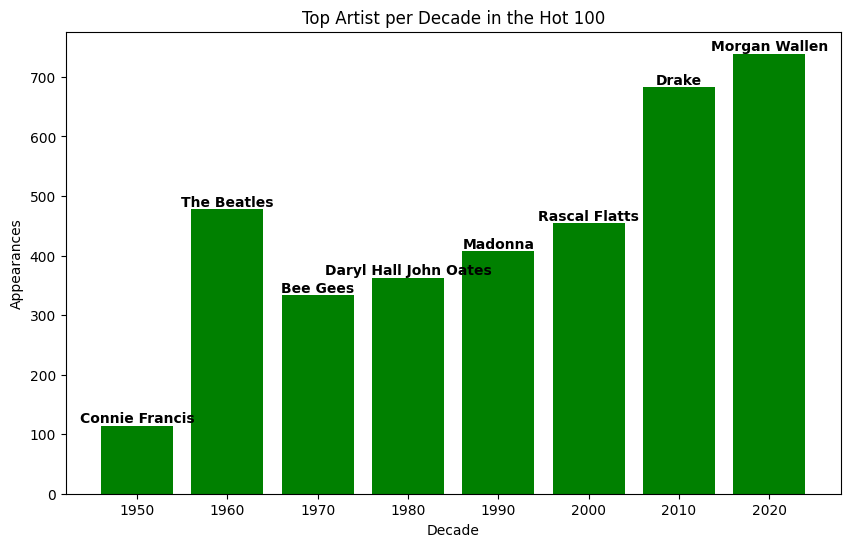

In [ ]:
top_artists_per_decade = (
    df
    .group_by(["decade", "artist"])
    .agg(pl.len().alias("count"))
    .sort(["decade", "count"], descending=[False, True])
    .group_by("decade")
    .head(1)
)

decades = top_artists_per_decade["decade"].to_pandas().astype(str)
counts = top_artists_per_decade["count"]
artists = top_artists_per_decade["artist"]

plt.figure(figsize=(10, 6))
bars = plt.bar(decades, counts, color="green")

for bar, artist in zip(bars, artists):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), artist, ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

plt.xlabel("Decade")
plt.ylabel("Appearances")
plt.title("Top Artist per Decade in the Hot 100")
plt.show()

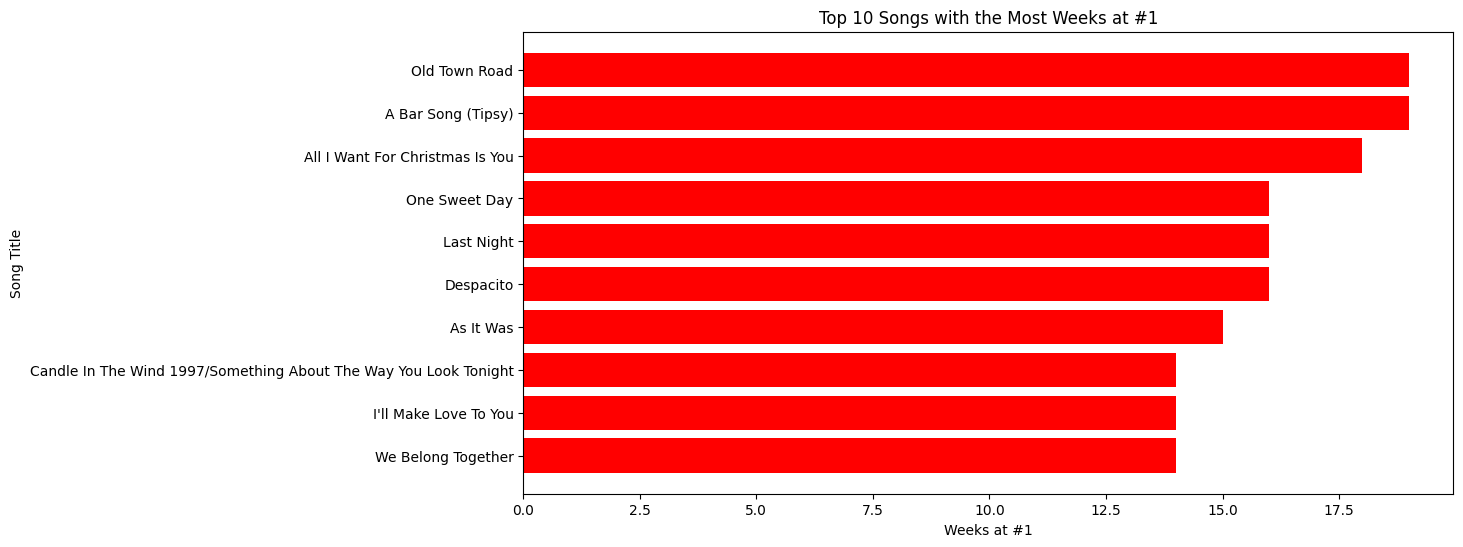

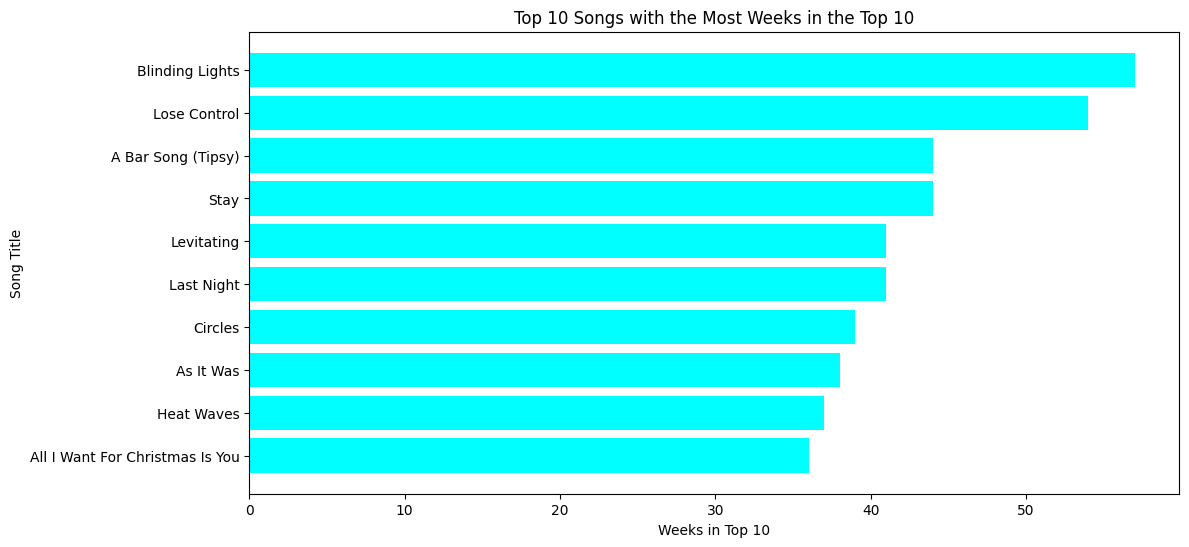

C:\Users\57302\AppData\Local\Temp\ipykernel_11668\3612235705.py:50: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()


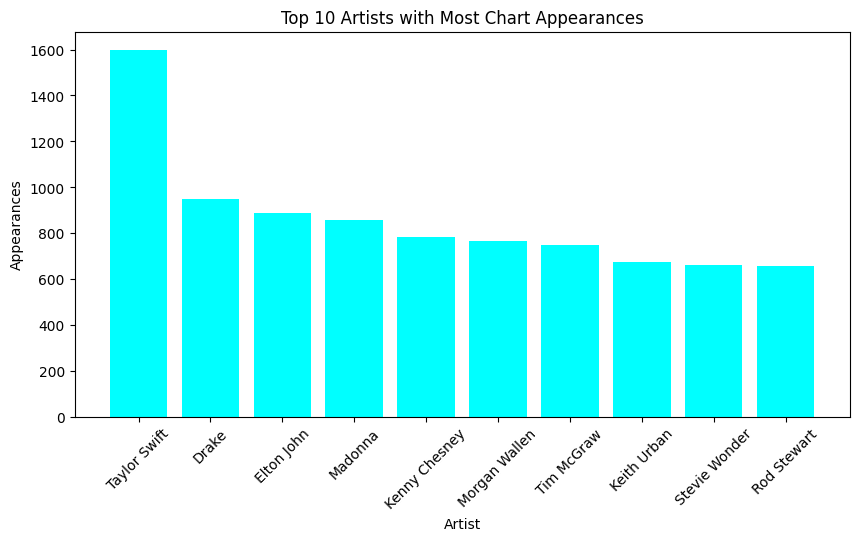

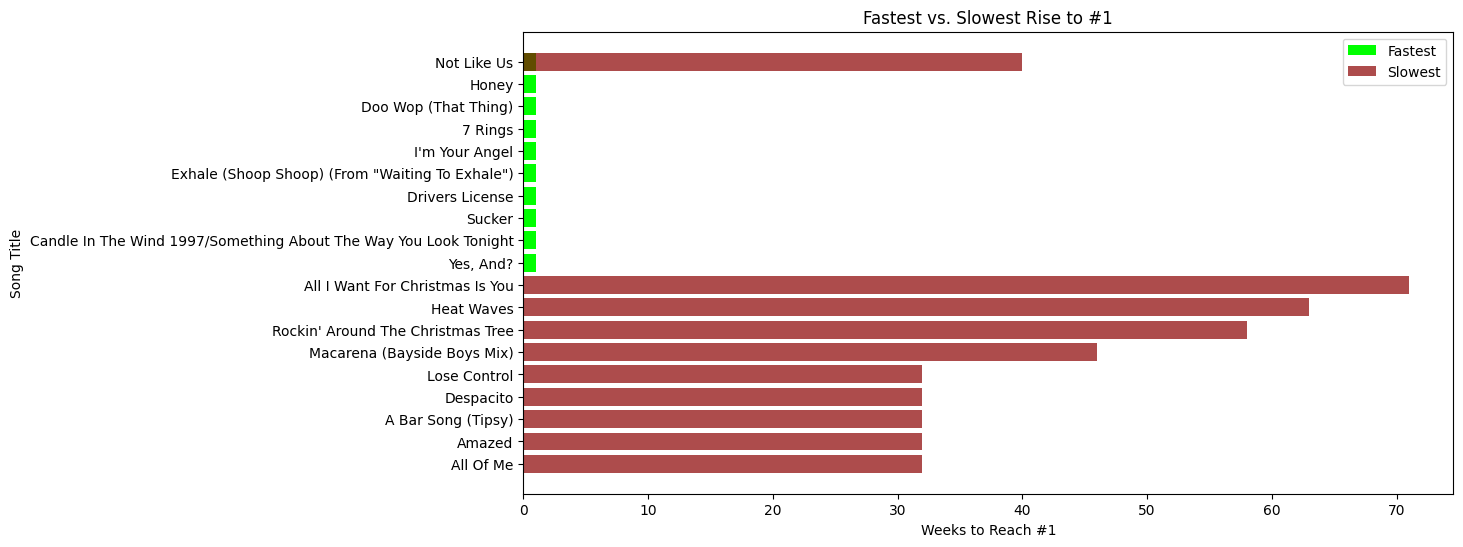

In [ ]:
most_weeks_at_one = (
    df
    .filter(pl.col("rank") == 1)
    .group_by(["title", "artist"])
    .agg(pl.len().alias("weeks_at_1"))
    .sort("weeks_at_1", descending=True)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.barh(most_weeks_at_one["title"], most_weeks_at_one["weeks_at_1"], color="red")
plt.xlabel("Weeks at #1")
plt.ylabel("Song Title")
plt.title("Top 10 Songs with the Most Weeks at #1")
plt.gca().invert_yaxis()
plt.show()

most_weeks_top10 = (
    df
    .filter(pl.col("rank") <= 10)
    .group_by(["title", "artist"])
    .agg(pl.len().alias("weeks_in_top10"))
    .sort("weeks_in_top10", descending=True)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.barh(most_weeks_top10["title"], most_weeks_top10["weeks_in_top10"], color="cyan")
plt.xlabel("Weeks in Top 10")
plt.ylabel("Song Title")
plt.title("Top 10 Songs with the Most Weeks in the Top 10")
plt.gca().invert_yaxis()
plt.show()

fastest_to_number_one = (
    df.filter(pl.col("rank") == 1)
    .group_by(["title", "artist"])
    .agg(pl.col("weeks_on_chart").min().alias("weeks_to_reach_1"))
    .sort("weeks_to_reach_1")
    .head(10)
)

top_artists = (
    df
    .group_by("artist")
    .count()
    .sort("count", descending=True)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.bar(top_artists["artist"], top_artists["count"], color="cyan")
plt.xlabel("Artist")
plt.ylabel("Appearances")
plt.title("Top 10 Artists with Most Chart Appearances")
plt.xticks(rotation=45)
plt.show()


slowest_to_number_one = (
    df.filter(pl.col("rank") == 1)
    .group_by(["title", "artist"])
    .agg(pl.col("weeks_on_chart").max().alias("weeks_to_reach_1"))
    .sort("weeks_to_reach_1", descending=True)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.barh(fastest_to_number_one["title"], fastest_to_number_one["weeks_to_reach_1"], color="lime", label="Fastest")
plt.barh(slowest_to_number_one["title"], slowest_to_number_one["weeks_to_reach_1"], color="darkred", alpha=0.7, label="Slowest")
plt.xlabel("Weeks to Reach #1")
plt.ylabel("Song Title")
plt.title("Fastest vs. Slowest Rise to #1")
plt.legend()
plt.gca().invert_yaxis()
plt.show()



conclution
